In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.linalg import norm
from tqdm import tqdm
from func_list import explicit_matrix,GenPointer,Grad,Div,BC_Div,Laplace,BC_Laplace,Adv,pointer_mapping,CG_solver,CG_solver_all,R_operator,S_operator,R_inv_operator,curl_operator,BC_Curl,inter_velocity

In [6]:
###Boundaries
uBC_L = 0
uBC_R = 0
uBC_B = 0
uBC_T = 1
vBC_L = 0
vBC_R = 0
vBC_T = 0
vBC_B = 0
Re=40
v=1/Re
dt=1/((1/dx)+(1/dy))
dt=dt/20
p  = np.zeros((np_, 1))
u  = np.zeros((nu, 1))
qi = np.zeros((nu,1))
b  = np.zeros((nu,1))
bcL=BC_Laplace(uBC_L, uBC_R, uBC_B, uBC_T, vBC_L, vBC_R, vBC_T, vBC_B,nu,iu,iv,nx,ny,dx,dy)
bcD = BC_Div(uBC_L, uBC_R, vBC_T, vBC_B,np_,ip,nx,ny,dx,dy)

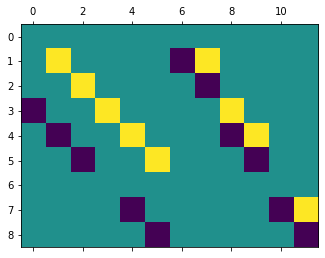

In [7]:
nx = 3
ny = 3
## Pointer and Grid
ip, iu, iv,idu = GenPointer(nx, ny)

dx = 1 / nx
dy = 1 / ny

np_ = nx * ny
nu = 2*nx*ny - nx - ny
dt=0.001
v=0.5
p  = np.zeros((np_, 1))
u  = np.zeros((nu, 1))


args=np_,nu,nx,ny,dx,dy,iu,iv,ip,dt,v
inp=nu
out=np_
A=explicit_matrix(Div,out,inp,args)
#args=np_,nu,nx,ny,dx,dy,iu,iv,ip,dt,v
#A,i=explicit_matrix(Grad,out,inp,args)
plt.matshow(A, fignum=None)
plt.show()

In [8]:
vis=pointer_mapping(A,0)

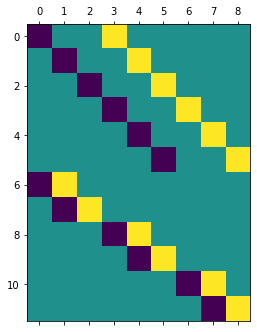

In [9]:
args=np_,nu,nx,ny,dx,dy,iu,iv,ip,dt,v
inp=np_
out=nu
B=explicit_matrix(Grad,out,inp,args)
plt.matshow(B, fignum=None)
plt.show()

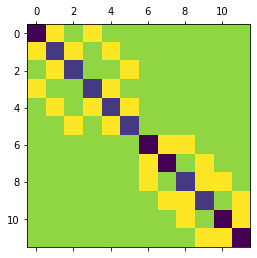

In [10]:
args=nu,iu,iv,nx,ny,dx,dy,dt,v
inp=nu
out=nu
C=explicit_matrix(Laplace,out,inp,args)
plt.matshow(C, fignum=None)
plt.show()

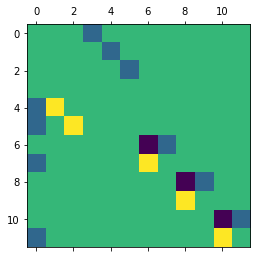

In [11]:
args=uBC_L, uBC_R, uBC_B, uBC_T, vBC_L, vBC_R, vBC_T, vBC_B,nu,iu,iv,nx,ny,dx,dy,dt,v
inp=nu
out=nu
D=explicit_matrix(Adv,out,inp,args)
plt.matshow(D, fignum=None)
plt.show()




In [12]:
pointer_mapping(D,0)

,x=0,x=1,x=2,x=3,x=4,x=5,x=6,x=7,x=8,x=9,x=10,x=11
y=0,-0.00,-0.00,-0.00,-0.0,-0.75,-0.75,-0.00,-0.75,0.00,-0.00,-0.00,-0.75
y=1,-0.00,-0.00,-0.00,-0.0,0.75,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00
y=2,-0.00,-0.00,-0.00,-0.0,-0.00,0.75,-0.00,-0.00,0.00,-0.00,-0.00,-0.00
y=3,-0.75,-0.00,-0.00,-0.0,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00
y=4,-0.00,-0.75,-0.00,-0.0,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00
y=5,-0.00,-0.00,-0.75,-0.0,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00
y=6,-0.00,-0.00,-0.00,-0.0,-0.00,-0.00,-1.50,0.75,0.00,-0.00,-0.00,-0.00
y=7,-0.00,-0.00,-0.00,-0.0,-0.00,-0.00,-0.75,-0.00,0.00,-0.00,-0.00,-0.00
y=8,-0.00,-0.00,-0.00,-0.0,-0.00,-0.00,-0.00,-0.00,-1.50,0.75,-0.00,-0.00
y=9,-0.00,-0.00,-0.00,-0.0,-0.00,-0.00,-0.00,-0.00,-0.75,-0.00,-0.00,-0.00


In [ ]:
 S_operator(u_new,nu,iu,iv,nx,ny,dx,dy,dt,v)

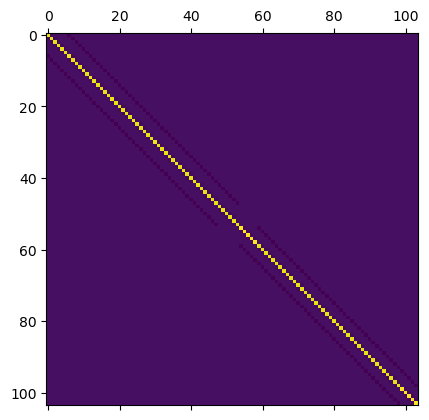

In [40]:
args=nu,iu,iv,nx,ny,dx,dy,dt,v
inp=nu
out=nu
S=explicit_matrix(R_operator,out,inp,args)
plt.matshow(S, fignum=None)
plt.show()




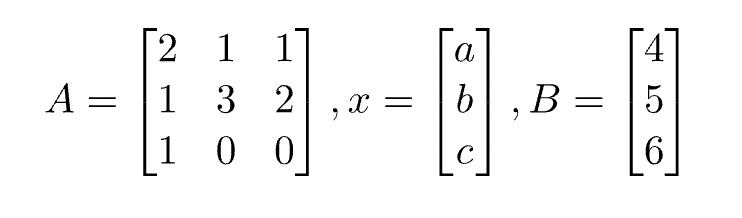

In [51]:
A=np.array([[2,1,1],[1,3,2],[1,0,0]])
b=np.array([[4],[5],[6]])

In [55]:
x=np.linalg.solve(A, b ) 

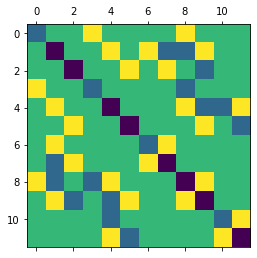

In [13]:
plt.matshow(B@A, fignum=None)
plt.show()

In [14]:
x=np.linalg.solve(B@A, b ) 

LinAlgError: Singular matrix